In [49]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/matt/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [52]:
# see the whole width of the table
pd.options.display.max_columns = 60
pd.options.display.max_rows = 20

# default plot settings
matplotlib.rc("figure", figsize=(12, 7))

# Read in data

Let's take a cheeky look at the data. It's in the FASTA format:

https://en.wikipedia.org/wiki/FASTA_format

Here's the example from the challenge email:

In [11]:
example_input = """>Frag_56
ATTAGACCTG
>Frag_57
CCTGCCGGAA
>Frag_58
AGACCTGCCG
>Frag_59
GCCGGAATAC
"""

example_output = "ATTAGACCTGCCGGAATAC"

In [9]:
with open('data/coding_challenge_data_set.txt') as f:
    data = f.read()
    
print(data[:3000])

>Rosalind_1836
GCGCCCGGGGCAAGAGTCATTATACTTGAGAATATACATTTAACAGCGGGCTCATAGCAC
AGCAGTTATAAAAGAGGCAGATTCCGACCCCTTAGGGACTATAGGTTTTCTGGGTGTCAA
CCCTTCGTGGTACTAGCGGGCGGCAATCCCTTAAATATCTAGGCCCGTACCATCGACAGG
GCAGATTGGCATTTATTTCTGGGCCTACACAAATGCGAATAACGATTACTAGCCGAGCAC
TCTCTTTTATGACAAGAGGGTTTCACATCCTCTTAGTATGTCCCGCACAATAACTTTTGC
GCAAAAGTGCTCTTGTTTATTTAGTGAATATCCAGGGGTAAGTGCTAATATGTGAGCGCT
GCTCTGCAGTTATGATGACCGGTTCATAGTTGCTCGTATTGGCACATGTACGGAAAGGCA
AATCATTCAAGTTTTGGGGAGGAATATGGCGGCCCACCTCCTTGGCCCACGGAGTCCCGC
CTTTGCGCTGGTGAAGGTGTCACTGCCCCCTAGATCATACCGCACTAAGTGGGGCCTGTA
TCGAAGGGTTTCTTGTTTAGGACAATCTTTGCTGTCTTCTTCACCCAATCACAGCTTGAT
TGAATGAGTAATCACTGAACATCGGGAGGCTCCATTTACCTAAGAATTCAGACGCCTGGT
TGGATCTGTGAGACACTCACGTATGGATGTTAACGACAAGGCACCTGGGGTACTTGTAAC
AAGTCATACACTATGCTGGGTACTACCCCAACGCAGAGTTTATGCCCCCATGCCACCGTT
GCCTTCACGTCACCACCATTCATCATCTAGCGAGGCCCTGGTGTCCTATTTTGTAGAGGG
GATATCTAGTGAGGGCCTATCATGCCACGGACGAGAACATAAAAATCTATAAAGAGCCTG
GTTCGATTCTGATAACCTAAAAGCTAAAACTGAGATGTTTGGCCCTTCGCGGGACCTGCA
GGTCGAGCT

# Shape the data

In [35]:
d = data.split('>')[1]
name_and_sequence(d)

('Rosalind_1836', Counter({'A': 248, 'C': 241, 'G': 243, 'T': 262}))

In [38]:
sequences[:3]

['Frag_56\nATTAGACCTG\n', 'Frag_57\nCCTGCCGGAA\n', 'Frag_58\nAGACCTGCCG\n']

In [ ]:
from collections import Counter
def name_and_sequence(paragraph):
    name, sequence = paragraph.split('\n', 1)
    return name, Counter(sequence.replace('\n', ''))
    
def counts_df(fasta_string):
    sequence_strings = fasta_string.split('>')[1:]
    sequence_counts = (name_and_sequence(seq) for seq in sequence_strings)
    return pd.DataFrame({name: counts for name, counts in sequence_counts}).T

In [59]:
example_counts = counts_df(example_input)
counts = counts_df(data)
counts.head()

,A,C,G,T
Rosalind_0030,257,247,234,260
Rosalind_0087,262,239,227,253
Rosalind_0093,249,248,234,252
Rosalind_0312,286,226,249,231
Rosalind_0368,253,254,231,255


# Plot the data

### How long are these sequences?

/Users/matt/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


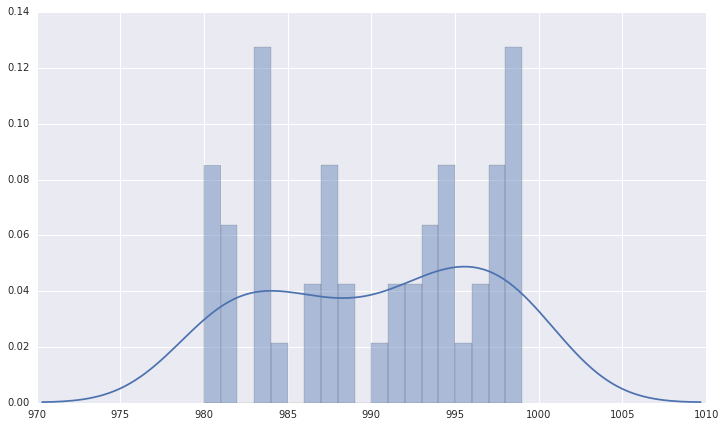

In [97]:
sequence_lengths = counts.sum(axis=1)
bin_range = range(sequence_lengths.min(), sequence_lengths.max())
sns.distplot(sequence_lengths, bins=bin_range)

### What does the nucleotide distribution look like? Sanity check: any outliers?

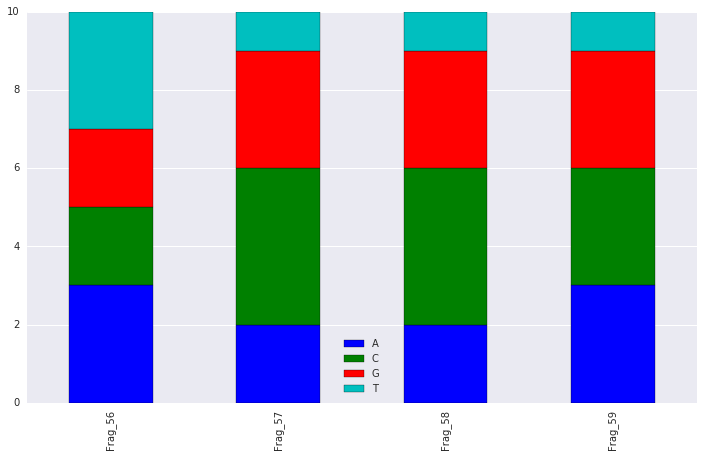

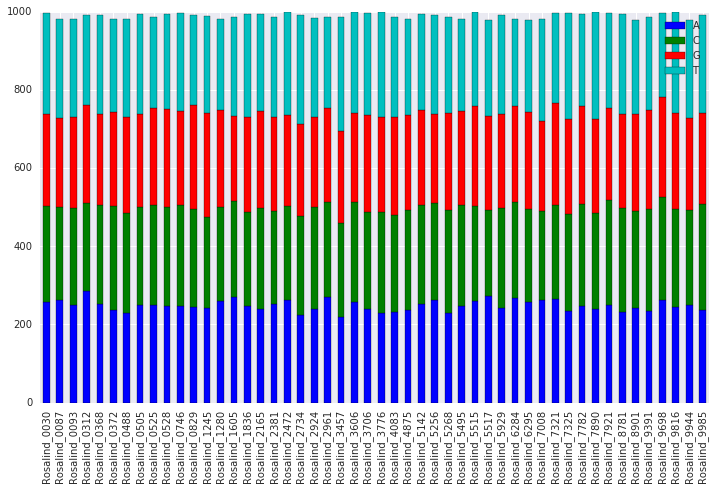

In [57]:
counts_df(example_input).plot.bar(stacked=True)
counts_df(data).plot.bar(stacked=True)

# Align the sequences